### Cargar librerias

In [1]:
import packages.Preprocesamiento as ppr
import os
import pandas as pd
import missingno as mo
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Data Discovering

In [2]:
df = pd.read_csv('Datos/Originales/cancellation_data.csv')

In [3]:
df.head()

,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,recurrence,libere_community,bought_products,product_count,reservation_net_value,total_adr,status,cancelled_at,cancellation_reason,cancellation_lead_time
0,"Nov 26, 2022, 16:10","Jan 1, 2023, 12:00","Jan 2, 2023, 12:00",36,1,January,Sunday,1,0,channel_manager,...,4,no,no,0,15.92,15.92,checked_out,NaN,NaN,NaN
1,"Dec 21, 2022, 17:27","Jan 1, 2023, 13:09","Jan 10, 2023, 12:00",11,9,January,Sunday,1,0,channel_manager,...,2,yes,no,0,117.78,13.09,checked_out,NaN,NaN,NaN
2,"Sep 21, 2022, 19:46","Jan 1, 2023, 15:00","Jan 7, 2023, 12:00",102,6,January,Sunday,2,4,channel_manager,...,1,no,yes,8,755.65,125.94,checked_out,NaN,NaN,NaN
3,"Sep 24, 2022, 12:09","Jan 1, 2023, 15:00","Jan 2, 2023, 12:00",99,1,January,Sunday,2,2,channel_manager,...,1,no,yes,1,186.37,186.37,checked_out,NaN,NaN,NaN
4,"Oct 18, 2022, 07:12","Jan 1, 2023, 15:00","Jan 2, 2023, 12:00",75,1,January,Sunday,4,0,channel_manager,...,1,no,no,0,77.02,77.02,checked_out,NaN,NaN,NaN


In [4]:
df.dtypes

booked_at                        object
checkin_time                     object
checkout_time                    object
lead_time                         int64
lenght_of_stay                    int64
checkin_month                    object
checkin_day                      object
adult_count                       int64
child_count                       int64
origin                           object
travel_agency_name               object
requested_category               object
requested_category_name          object
asset                            object
asset_type                       object
brand                            object
asset_opening_date               object
available_units                   int64
business_segment                 object
rate                             object
rate_group_name                  object
rate_type                        object
completed_entry_forms_count     float64
all_entry_forms_completed        object
last_entry_form_completed_at     object


In [5]:
df.shape

(56448, 36)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56448 entries, 0 to 56447
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   booked_at                     56448 non-null  object 
 1   checkin_time                  56448 non-null  object 
 2   checkout_time                 56448 non-null  object 
 3   lead_time                     56448 non-null  int64  
 4   lenght_of_stay                56448 non-null  int64  
 5   checkin_month                 56448 non-null  object 
 6   checkin_day                   56448 non-null  object 
 7   adult_count                   56448 non-null  int64  
 8   child_count                   56448 non-null  int64  
 9   origin                        56448 non-null  object 
 10  travel_agency_name            38342 non-null  object 
 11  requested_category            56448 non-null  object 
 12  requested_category_name       56448 non-null  object 
 13  a

    Cambiar a formato fecha

In [7]:
# df['booked_at'] = pd.to_datetime(df['booked_at'], format='%b %d, %Y, %H:%M')
# df['checkin_time'] = pd.to_datetime(df['checkin_time'], format='%b %d, %Y, %H:%M')
# df['checkout_time'] = pd.to_datetime(df['checkout_time'], format='%b %d, %Y, %H:%M')
# df['asset_opening_date'] = pd.to_datetime(df['asset_opening_date'], format='%b %d, %Y, %H:%M')
# df['cancelled_at'] = pd.to_datetime(df['cancelled_at'], format='%b %d, %Y, %H:%M')
# df['last_entry_form_completed_at'] = pd.to_datetime(df['last_entry_form_completed_at'], format='%b %d, %Y, %H:%M')

In [8]:
df['booked_at'] = pd.to_datetime(df['booked_at'], format="mixed", errors="coerce")
df['checkin_time'] = pd.to_datetime(df['checkin_time'], format="mixed", errors="coerce")
df['checkout_time'] = pd.to_datetime(df['checkout_time'], format="mixed", errors="coerce")
df['asset_opening_date'] = pd.to_datetime(df['asset_opening_date'], format="mixed", errors="coerce")
df['cancelled_at'] = pd.to_datetime(df['cancelled_at'], format="mixed", errors="coerce")
df['last_entry_form_completed_at'] = pd.to_datetime(df['last_entry_form_completed_at'], format="mixed", errors="coerce")

In [9]:
df.dtypes

booked_at                       datetime64[ns]
checkin_time                    datetime64[ns]
checkout_time                   datetime64[ns]
lead_time                                int64
lenght_of_stay                           int64
checkin_month                           object
checkin_day                             object
adult_count                              int64
child_count                              int64
origin                                  object
travel_agency_name                      object
requested_category                      object
requested_category_name                 object
asset                                   object
asset_type                              object
brand                                   object
asset_opening_date              datetime64[ns]
available_units                          int64
business_segment                        object
rate                                    object
rate_group_name                         object
rate_type    

In [10]:
df.head()

,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,recurrence,libere_community,bought_products,product_count,reservation_net_value,total_adr,status,cancelled_at,cancellation_reason,cancellation_lead_time
0,2022-11-26 16:10:00,2023-01-01 12:00:00,2023-01-02 12:00:00,36,1,January,Sunday,1,0,channel_manager,...,4,no,no,0,15.92,15.92,checked_out,NaT,NaN,NaN
1,2022-12-21 17:27:00,2023-01-01 13:09:00,2023-01-10 12:00:00,11,9,January,Sunday,1,0,channel_manager,...,2,yes,no,0,117.78,13.09,checked_out,NaT,NaN,NaN
2,2022-09-21 19:46:00,2023-01-01 15:00:00,2023-01-07 12:00:00,102,6,January,Sunday,2,4,channel_manager,...,1,no,yes,8,755.65,125.94,checked_out,NaT,NaN,NaN
3,2022-09-24 12:09:00,2023-01-01 15:00:00,2023-01-02 12:00:00,99,1,January,Sunday,2,2,channel_manager,...,1,no,yes,1,186.37,186.37,checked_out,NaT,NaN,NaN
4,2022-10-18 07:12:00,2023-01-01 15:00:00,2023-01-02 12:00:00,75,1,January,Sunday,4,0,channel_manager,...,1,no,no,0,77.02,77.02,checked_out,NaT,NaN,NaN


### Data Cleaning

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56448 entries, 0 to 56447
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   booked_at                     56448 non-null  datetime64[ns]
 1   checkin_time                  56448 non-null  datetime64[ns]
 2   checkout_time                 56448 non-null  datetime64[ns]
 3   lead_time                     56448 non-null  int64         
 4   lenght_of_stay                56448 non-null  int64         
 5   checkin_month                 56448 non-null  object        
 6   checkin_day                   56448 non-null  object        
 7   adult_count                   56448 non-null  int64         
 8   child_count                   56448 non-null  int64         
 9   origin                        56448 non-null  object        
 10  travel_agency_name            38342 non-null  object        
 11  requested_category          

    Duplicados

In [12]:
# Ver cuantos duplicados en total
df.duplicated().sum()

np.int64(2306)

In [13]:
# Eliminar duplicados dejando la primera aparición
df = df.drop_duplicates(keep='first')

    Mirar cada variable
    

In [14]:
# La columna 'completed_entry_forms_count' indica la canidad de formularios completados (1 por persona) para el checking.
# Y luego la columna 'all_entry_forms_completed' indica 'yes' si hay algun formulario copletado, y 'no' si son 0 formularios completados
# Entonces los missings de 'completed_entry_forms_count' corresponden a 0 (SIEMPRE Y CUANDO LA COLUMNA 'all_entry_forms_completed' SEA 'NO')

Variable completed_entry_forms_count

In [15]:
df.value_counts('completed_entry_forms_count')

completed_entry_forms_count
1.0     16471
2.0     14983
0.0     11697
3.0      3804
4.0      3520
5.0       847
6.0       599
8.0       140
7.0       106
10.0        9
9.0         5
Name: count, dtype: int64

In [16]:
# Convertimos los yes a True y no a False
df['all_entry_forms_completed'].replace({'yes':True, 'no':False}, inplace=True)

C:\Users\Uxue Duran Nuño\AppData\Local\Temp\ipykernel_18684\4014906850.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['all_entry_forms_completed'].replace({'yes':True, 'no':False}, inplace=True)
C:\Users\Uxue Duran Nuño\AppData\Local\Temp\ipykernel_18684\4014906850.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_sile

In [17]:
# Verificamos que se ha cambiado correctamente
df['all_entry_forms_completed'] 

0         True
1         True
2         True
3         True
4         True
         ...  
56443     True
56444     True
56445     True
56446     True
56447    False
Name: all_entry_forms_completed, Length: 54142, dtype: bool

In [18]:
# Vemos cuantos formularios no se han completado
sum(df['all_entry_forms_completed']==False)

13963

In [19]:
# Vemos que en 0 formularios completados hay 24 que son True por lo que no tiene sentido
pd.crosstab(df['completed_entry_forms_count'], df['all_entry_forms_completed'])

all_entry_forms_completed,False,True
completed_entry_forms_count,,
0.0,11673,24
1.0,245,16226
2.0,34,14949
3.0,30,3774
4.0,12,3508
5.0,6,841
6.0,2,597
7.0,0,106
8.0,0,140


In [20]:
# Por lo que decidimos que todos los que han completado 0 formularios tienen que ser False
df.loc[df['completed_entry_forms_count'] == 0, 'all_entry_forms_completed'] = False

In [21]:
# Verficamos que no ha quedado ningun registro con 0 formularios que sea True
df[(df['completed_entry_forms_count'] == 0) & (df['all_entry_forms_completed'] == True)]

,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,recurrence,libere_community,bought_products,product_count,reservation_net_value,total_adr,status,cancelled_at,cancellation_reason,cancellation_lead_time


Variable ....

    Valores missings

In [22]:
#Ver valores faltantes
df.isna().sum()

booked_at                           0
checkin_time                        0
checkout_time                       0
lead_time                           0
lenght_of_stay                      0
checkin_month                       0
checkin_day                         0
adult_count                         0
child_count                         0
origin                              0
travel_agency_name              16533
requested_category                  0
requested_category_name             0
asset                               0
asset_type                          0
brand                               0
asset_opening_date                  0
available_units                     0
business_segment                    0
rate                                0
rate_group_name                     0
rate_type                           0
completed_entry_forms_count      1961
all_entry_forms_completed           0
last_entry_form_completed_at    13658
returning_inhabitant                0
recurrence  

<Axes: >

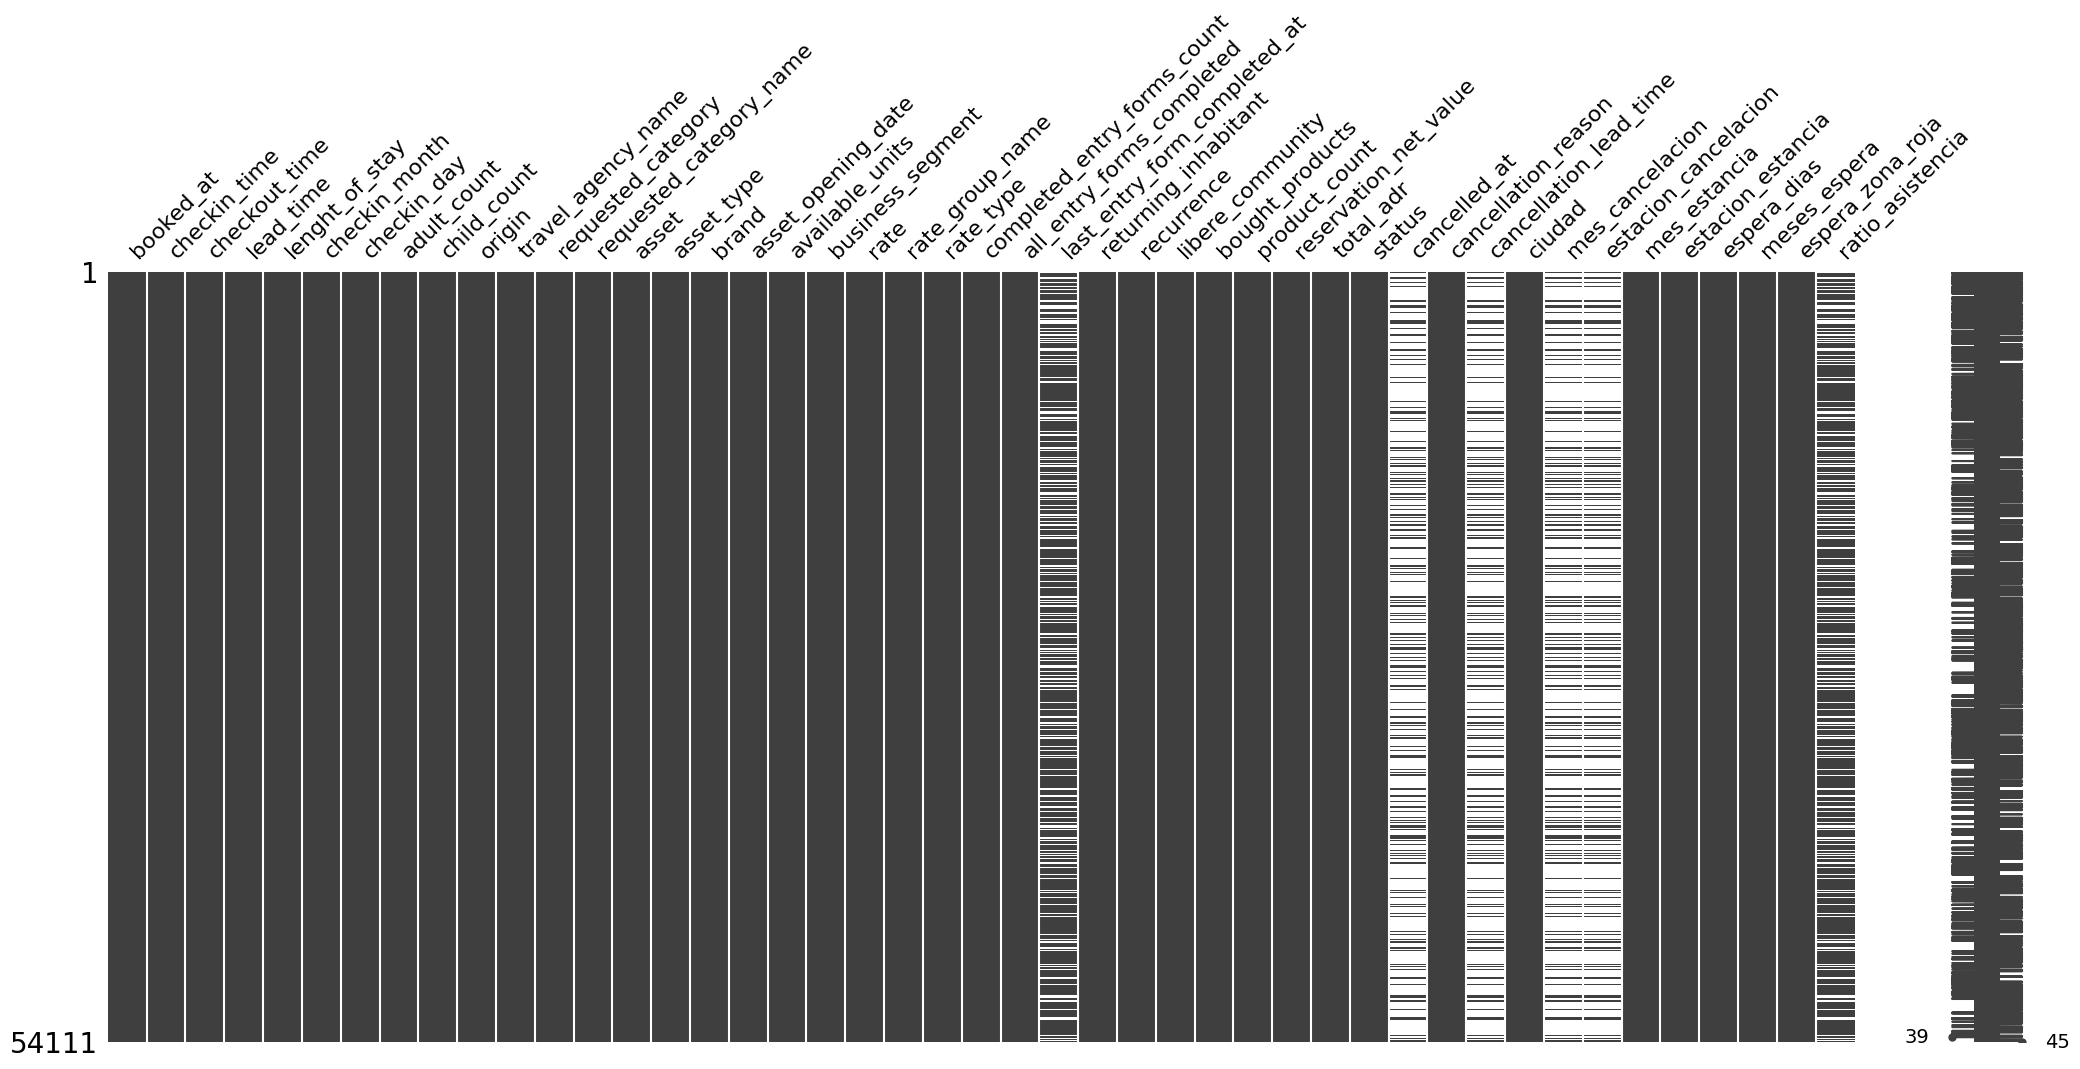

In [45]:
mo.matrix(df) # graficar NA's en forma de matriz

In [24]:
# Miramos en que columnas exactamente estan los NA's
df_na = df.isna().sum()
df_na[df_na > 0]
# total_adr 1
# travel_agency 18106
# completed_entry_forms_count 3276
# last_entry_form_completed_at 15948
# cancelled_at 41853
# cancellation_reason 41853
# cancellation_lead_time 41853


travel_agency_name              16533
completed_entry_forms_count      1961
last_entry_form_completed_at    13658
total_adr                           1
cancelled_at                    40915
cancellation_reason             40915
cancellation_lead_time          40915
dtype: int64

In [25]:
# Ver el tipo de varaible en el qu estan los NA's
df_na = df_na[df_na > 0]   # solo columnas con NA

df_na_types = df_na.to_frame(name='na_count')
df_na_types['dtype'] = df[df_na.index].dtypes.values

df_na_types

,na_count,dtype
travel_agency_name,16533,object
completed_entry_forms_count,1961,float64
last_entry_form_completed_at,13658,datetime64[ns]
total_adr,1,object
cancelled_at,40915,datetime64[ns]
cancellation_reason,40915,object
cancellation_lead_time,40915,float64


    Imputar missings en columnas caracter 

Variable travel_agency_name

In [26]:
# Si en origin es channel_manager y en travel_agency_name es na, se pone que es no informado
channel_ma_na = (df['origin'] == 'channel_manager') & (df['travel_agency_name'].isna())
df.loc[channel_ma_na, 'travel_agency_name'] = 'no_informado'

# Si en origin no es channel_manager y en travel_agency_name es na, se pone que es sin agencia
origin_otros_na = (df['origin'] != 'channel_manager') & (df['travel_agency_name'].isna())
df.loc[origin_otros_na, 'travel_agency_name'] = 'sin_agencia'

Variable completed_entry_forms_count

In [27]:
# Ver si todos los Na son false
df[df['completed_entry_forms_count'].isna() &(df['all_entry_forms_completed'] == False)].shape[0]

1961

In [28]:
# Rellenamos los Nas con 0
df['completed_entry_forms_count'] = df['completed_entry_forms_count'].fillna(0)

Variable total_adr

In [29]:
# Pasamos a numerico
df['total_adr'] = pd.to_numeric(df['total_adr'], errors='coerce')

In [30]:
# Como hay un unico Na lo eliminamos
df = df.dropna(subset=['total_adr'])

Variable cancelled_at

In [31]:
# Si cancellation_reason es na y cancelled_at es na, ponemos: no_canelado
df.loc[df['cancellation_reason'].isna() & df['cancelled_at'].isna(), 'cancellation_reason'] = 'no_cancelado'
# Si cancellation_reason es na y cancelled_at no es na, ponemos: cancelado_sin_motivo 
df.loc[df['cancellation_reason'].isna() & df['cancelled_at'].notna(), 'cancellation_reason'] = 'cancelado_sin_motivo'


In [32]:
df_na = df.isna().sum()
df_na[df_na > 0]
# last_entry_form_completed_at 13643 
# cancelled_at 40894
# cancellation_lead_time 40894

last_entry_form_completed_at    13643
cancelled_at                    40894
cancellation_lead_time          40894
dtype: int64

    Variables creadas

In [33]:
df['asset'].unique()

array(['Koisi Hostel', 'Líbere Vitoria', 'Líbere Bilbao Museo',
       'Líbere Bilbao La Vieja', 'Líbere Valencia Abastos',
       'Líbere Valencia Jardín Botánico', 'Líbere Madrid Palacio Real',
       'Líbere Málaga Teatro Romano', 'Líbere Granada Catedral',
       'Líbere Málaga la Merced', 'Líbere Córdoba Patio Santa Marta',
       'Líbere Pamplona Yamaguchi'], dtype=object)

In [34]:
# Como la variable 'asset' tiene en su gran mayoría 3 palabras, las dividimos mediante str.split y nos quedamos con la palabra en la posición 2[1]
df['ciudad'] = df['asset'].str.split().str[1]

In [35]:
# En el caso de Koisi Hostel, no aparece el nombre de la ciudad, por lo que nos quedamos con Hostel y despues reemplazamos por Donosti
condicion = (df['ciudad'] == 'Hostel')
df.loc[condicion, 'ciudad'] = 'Donosti'

In [36]:
# Comprobamos que no haya habido ningun error
print(df['ciudad'].value_counts())
print(df['asset'].value_counts())

ciudad
Vitoria     12937
Donosti     10408
Córdoba     10073
Madrid       5006
Pamplona     3718
Málaga       3674
Valencia     3479
Bilbao       3265
Granada      1551
Name: count, dtype: int64
asset
Líbere Vitoria                      12937
Koisi Hostel                        10408
Líbere Córdoba Patio Santa Marta    10073
Líbere Madrid Palacio Real           5006
Líbere Pamplona Yamaguchi            3718
Líbere Málaga Teatro Romano          2525
Líbere Valencia Jardín Botánico      1770
Líbere Bilbao La Vieja               1716
Líbere Valencia Abastos              1709
Líbere Granada Catedral              1551
Líbere Bilbao Museo                  1549
Líbere Málaga la Merced              1149
Name: count, dtype: int64


##### Crear mes_cancelacion y estación_cancelacion

In [37]:
def mes_a_estacion(mes):
    if pd.isna(mes):
        return np.nan
    mes = int(mes)
    if mes in [12, 1, 2]:
        return "Invierno"
    elif mes in [3, 4, 5]:
        return "Primavera"
    elif mes in [6, 7, 8]:
        return "Verano"
    else:
        return "Otoño"

df["mes_cancelacion"] = df["cancelled_at"].dt.month
df["estacion_cancelacion"] = df["mes_cancelacion"].apply(mes_a_estacion)

##### Crear mes_estancia y estacion_estancia

In [38]:
df["mes_estancia"] = df["checkin_time"].dt.month
df["estacion_estancia"] = df["mes_estancia"].apply(mes_a_estacion)

##### Calcular tiempo de espera (entre la reserva y la estancia)

In [39]:
df["espera_dias"] = (df["checkin_time"] - df["booked_at"]).dt.days

##### Detectar meses con más cancelaciones (zona roja)

In [40]:
cancel_counts = df["mes_cancelacion"].value_counts()
cancel_counts

mes_cancelacion
5.0     1208
7.0     1171
6.0     1157
3.0     1143
9.0     1133
4.0     1131
10.0    1116
8.0     1111
1.0     1109
2.0     1062
12.0     987
11.0     889
Name: count, dtype: int64

In [41]:
# meses en el percentil 75 hacia arriba
umbral = cancel_counts.quantile(0.75)
meses_rojos = cancel_counts[cancel_counts >= umbral].index.tolist()

In [42]:
# Función para obtener todos los meses entre dos fechas

def meses_entre_fechas(fecha_ini, fecha_fin):
    """Devuelve una lista con los meses entre dos fechas (incluye inicio y fin)."""

    meses = []
    fecha_actual = fecha_ini.replace(day=1)

    while fecha_actual <= fecha_fin:
        meses.append(fecha_actual.month)
        # avanzar al siguiente mes
        if fecha_actual.month == 12:
            fecha_actual = fecha_actual.replace(year=fecha_actual.year + 1, month=1)
        else:
            fecha_actual = fecha_actual.replace(month=fecha_actual.month + 1)

    return meses

# Aplicar esta funcion a cada fila
df["meses_espera"] = df.apply(
    lambda row: meses_entre_fechas(row["booked_at"], row["checkin_time"]),
    axis=1
)


In [43]:
# Crear la variable espera_zona_roja
df["espera_zona_roja"] = df["meses_espera"].apply(
    lambda lista_meses: int(any(m in meses_rojos for m in lista_meses))
)

##### Ratio de asistencia: (adult_count + child_count) / (completed_entry_forms_count)

In [44]:
# Asegurar columnas
df["adult_count"] = pd.to_numeric(df.get("adult_count", 0), errors="coerce").fillna(0)
df["child_count"] = pd.to_numeric(df.get("child_count", 0), errors="coerce").fillna(0)

df["ratio_asistencia"] = (df["adult_count"] + df["child_count"]) / df["completed_entry_forms_count"].replace({0: np.nan})